In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.exceptions import DataConversionWarning
import warnings
from tensorflow.keras.applications.mobilenet import preprocess_input
import random

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


random_state = 42
np.random.seed(random_state)


batch_size = 32
epochs = 500


dataset_path = "plant_dataset"  

In [ ]:

categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 
         'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 
         'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)

In [ ]:

images = []
labels = []

max_images_per_category = 300

for label_idx, category in enumerate(categ): 
    category_path = os.path.join(dataset_path, category)
    print(f"Processing category: {category}")

    
    if not os.path.exists(category_path):
        print(f"Warning: Directory not found - {category_path}")
        continue
    
    
    all_img_names = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    
    
    random.shuffle(all_img_names)
    
    
    selected_img_names = all_img_names[:max_images_per_category]
    
    
    for img_name in selected_img_names:
        img_path = os.path.join(category_path, img_name)
        try:
            
            img = cv2.imread(img_path)
            
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

print(f"Total number of images after balancing: {len(images)}")


Processing category: Black-grass
Processing category: Charlock
Processing category: Cleavers
Processing category: Common Chickweed
Processing category: Common wheat
Processing category: Fat Hen
Processing category: Loose Silky-bent
Processing category: Maize
Processing category: Scentless Mayweed
Processing category: Shepherds Purse
Processing category: Small-flowered Cranesbill
Processing category: Sugar beet
Total number of images after balancing: 3323


In [ ]:

images = np.array(images)
labels = np.array(labels)


np.save("images.npy", images)


In [ ]:

labels_df = pd.DataFrame(labels, columns=['Label'])
labels_df.to_csv("Labels.csv", index=False)

print("Images and labels have been saved successfully!")


Images and labels have been saved successfully!


In [ ]:

data = np.load("images.npy")
print("Images shape:", data.shape)

ylabels = pd.read_csv("Labels.csv")
print(ylabels.head())

Images shape: (3323, 128, 128, 3)
         Label
0  Black-grass
1  Black-grass
2  Black-grass
3  Black-grass
4  Black-grass


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_48364\113026162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ylabels['Label'], order=ylabels['Label'].value_counts().index, palette='Greens_r')


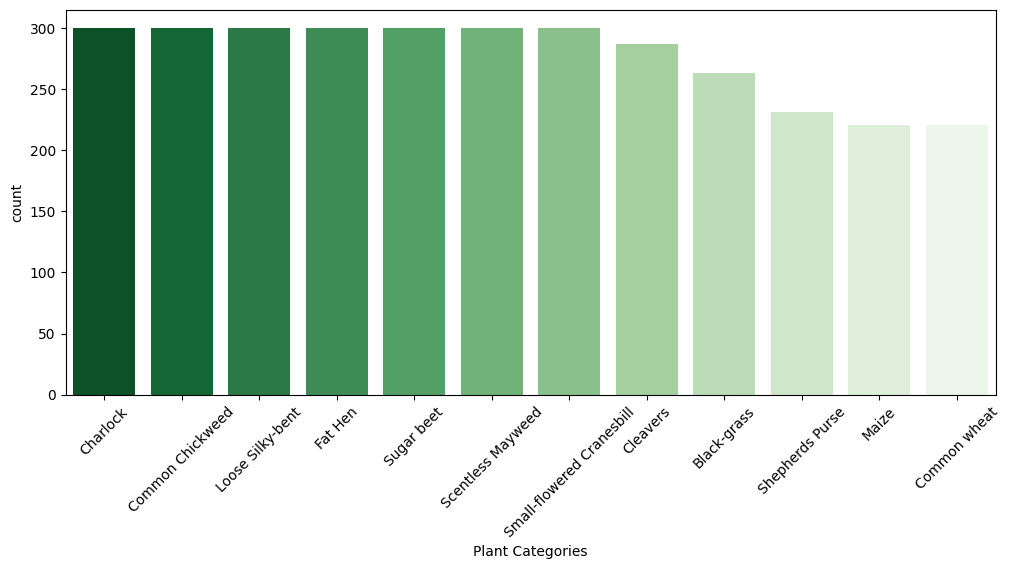

In [ ]:

plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(x=ylabels['Label'], order=ylabels['Label'].value_counts().index, palette='Greens_r')
plt.xlabel('Plant Categories')
plt.xticks(rotation=45)
plt.show()

In [8]:
from mpl_toolkits.axes_grid1 import ImageGrid

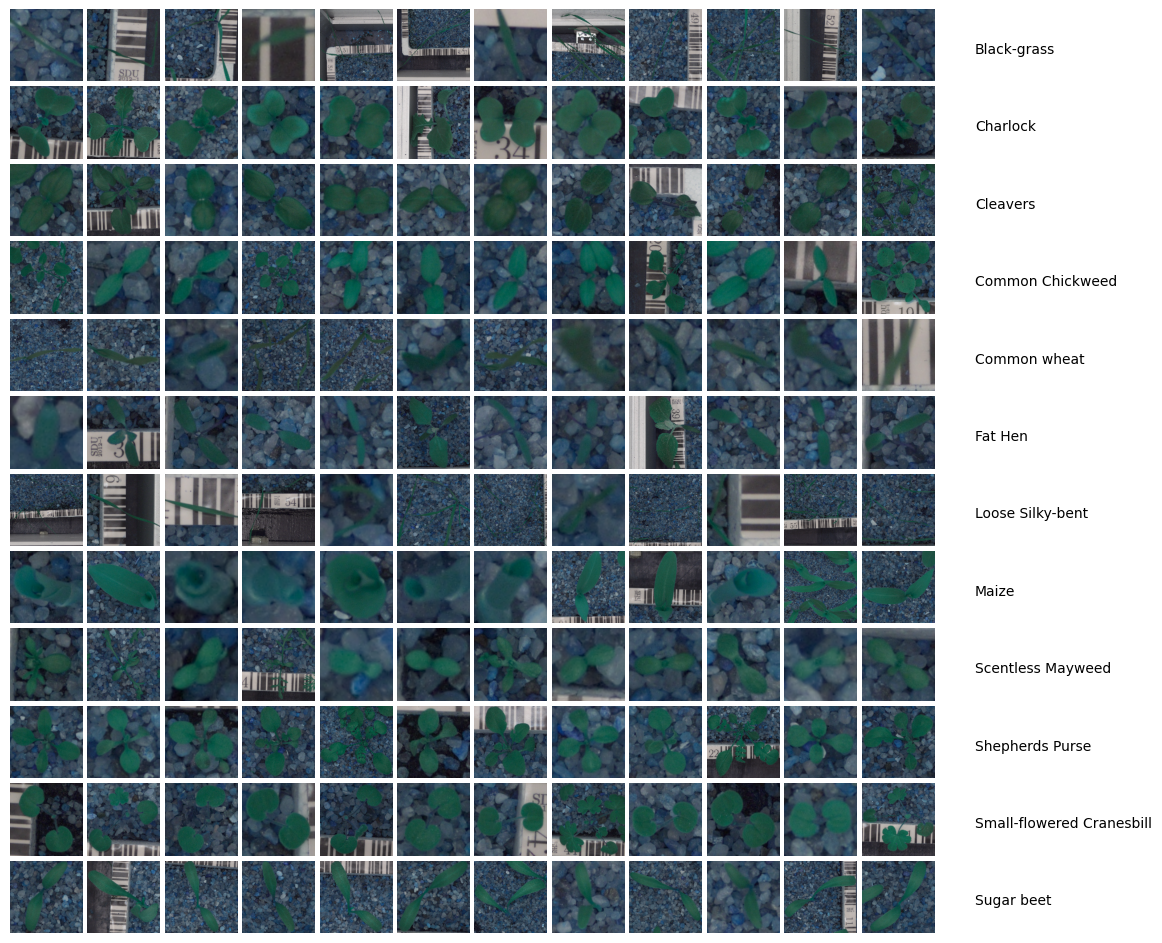

In [ ]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(data[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show()

In [ ]:
image_index = 1000

original_img = data[image_index]

resized_img = cv2.resize(original_img, (64, 64))

In [ ]:
blurred_img = cv2.GaussianBlur(resized_img, (3, 3), 0)

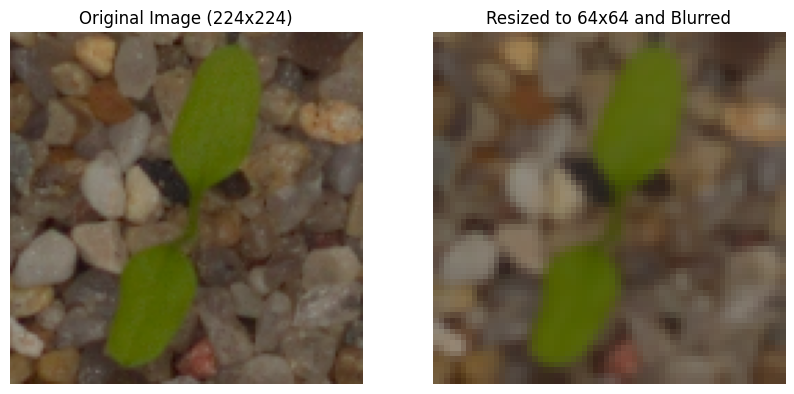

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image (224x224)")
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Resized to 64x64 and Blurred")
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

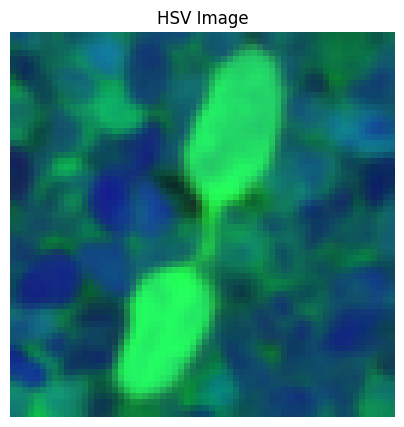

In [ ]:
hsv_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(5, 5))
plt.title("HSV Image")
plt.imshow(hsv_img)
plt.axis('off')
plt.show()

In [ ]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsv_img, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

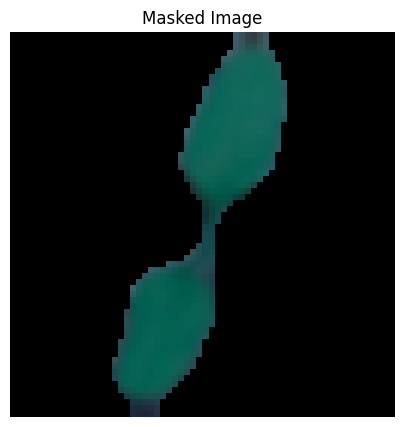

In [ ]:
b_mask = mask > 0
clear_img = np.zeros_like(blurred_img, np.uint8)  
clear_img[b_mask] = blurred_img[b_mask]  


plt.figure(figsize=(5, 5))
plt.title("Masked Image")
plt.imshow(clear_img)
plt.axis('off')
plt.show()

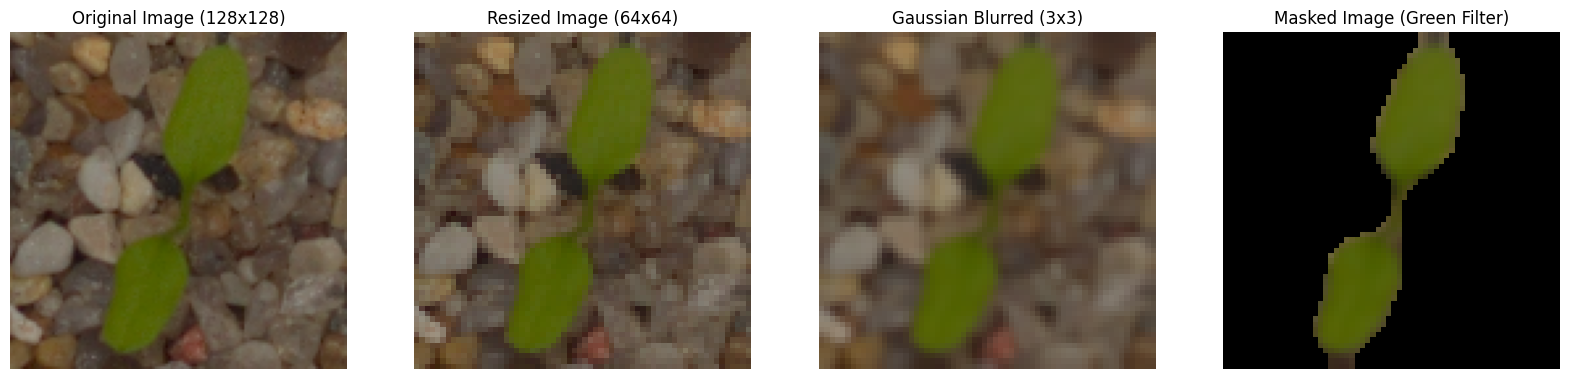

In [ ]:

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image (128x128)")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Resized Image (64x64)")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
ax[2].set_title("Gaussian Blurred (3x3)")
ax[2].axis("off")

ax[3].imshow(cv2.cvtColor(clear_img, cv2.COLOR_BGR2RGB))
ax[3].set_title("Masked Image (Green Filter)")
ax[3].axis("off")

plt.show()


In [17]:
data_copy = data.copy()

In [ ]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in data:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)  
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  
  clearImg[bMask] = resize_img[bMask]  
  

  preprocessed_data_color.append(clearImg)


preprocessed_data_color = np.asarray(preprocessed_data_color)

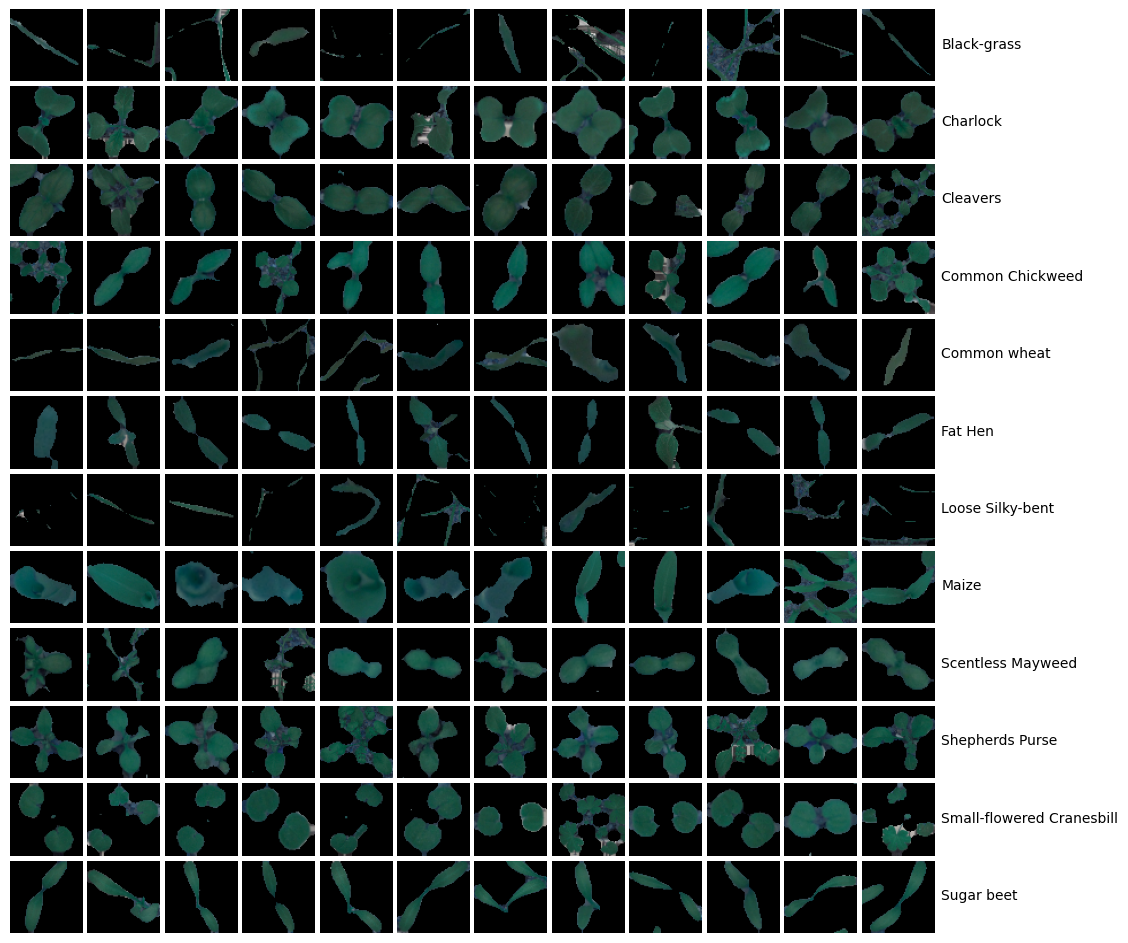

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      
      
      ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show()

In [20]:
preprocessed_data_color.shape

(3323, 64, 64, 3)

In [21]:
preprocessed_data_gs = []
for img in preprocessed_data_color:
  gi = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_data_gs.append(gi)

preprocessed_data_gs = np.asarray(preprocessed_data_gs)

In [22]:
preprocessed_data_gs.shape

(3323, 64, 64)

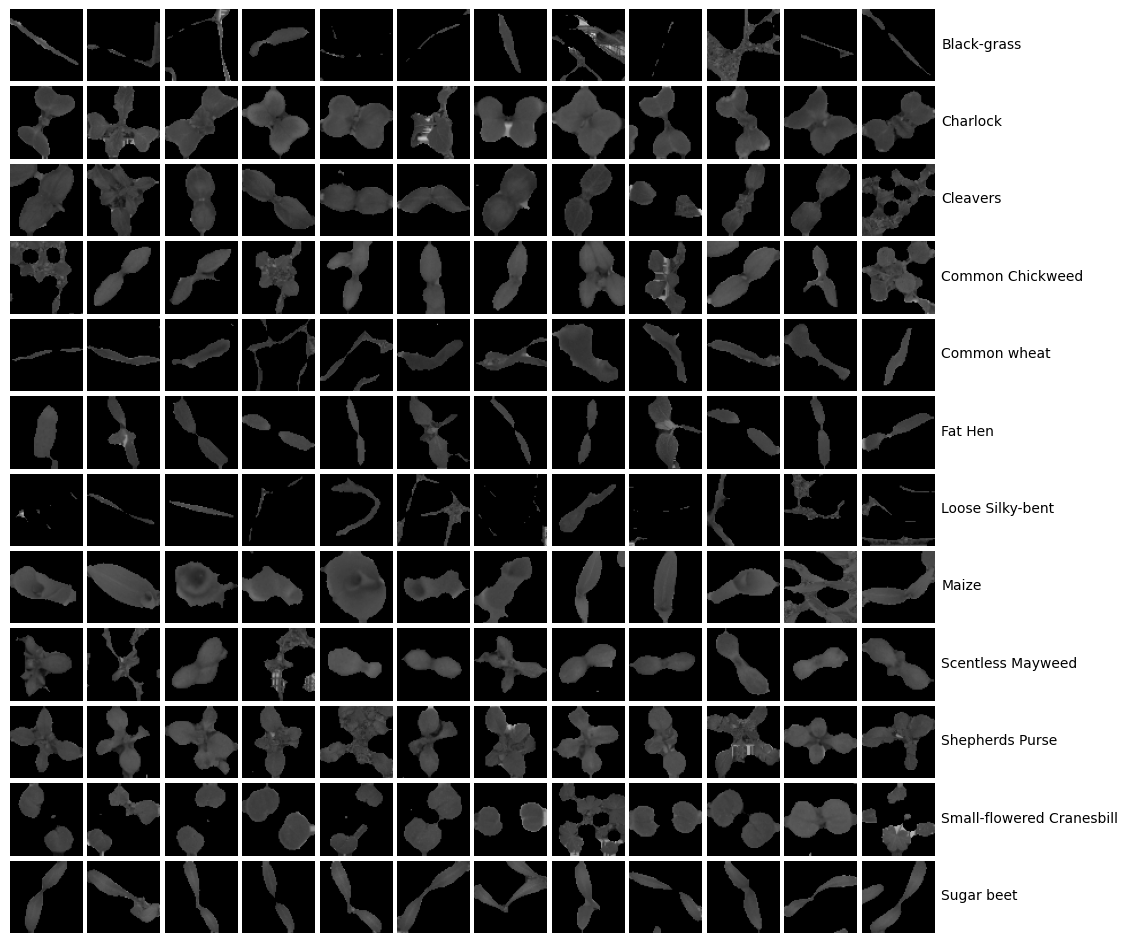

In [ ]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      
      
      ax.imshow(preprocessed_data_gs[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

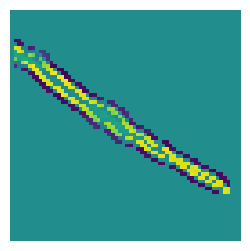

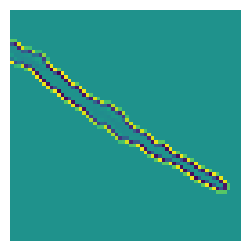

In [24]:
sobel = cv2.Sobel(preprocessed_data_gs[0]*255, cv2.CV_64F,1,1,ksize=3)
laplacian = cv2.Laplacian(preprocessed_data_gs[0]*255, cv2.CV_64F)
plt.figure(figsize=(3, 3))
plt.imshow(sobel)
plt.axis('off')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(laplacian)
plt.axis('off')
plt.show()

In [25]:
preprocessed_data_Edge_Lap = []
for img in preprocessed_data_gs:
  egi = cv2.Laplacian(img*255, cv2.CV_64F)
  preprocessed_data_Edge_Lap.append(egi)

preprocessed_data_Edge_Lap = np.asarray(preprocessed_data_Edge_Lap)

In [26]:
preprocessed_data_Edge_Lap.shape

(3323, 64, 64)

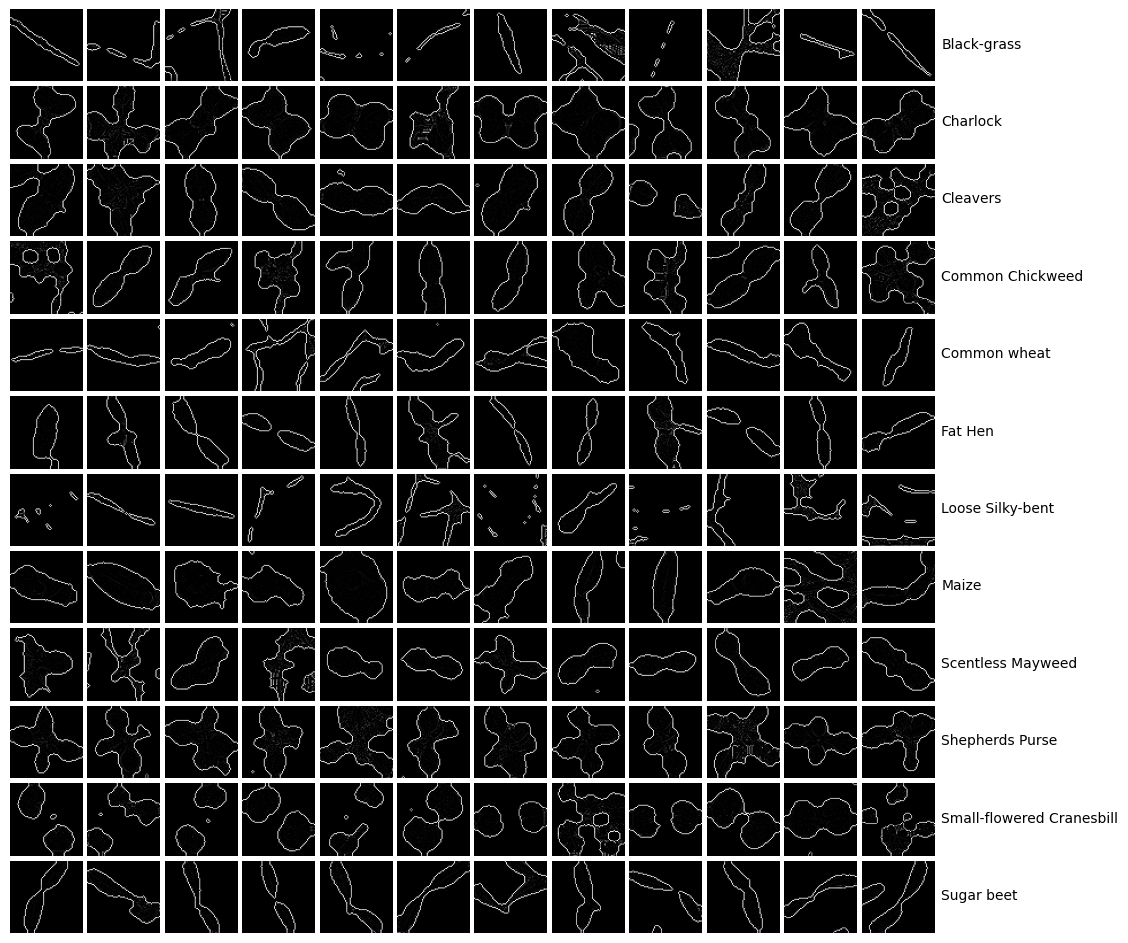

In [ ]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
     
      
      ax.imshow(preprocessed_data_Edge_Lap[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show()

In [28]:
preprocessed_data_gs = preprocessed_data_gs / 255.
preprocessed_data_color = preprocessed_data_color / 255.
preprocessed_data_Edge_Lap = preprocessed_data_Edge_Lap / 255.

In [29]:
ylabels['Label'] = ylabels['Label'].astype('category')
ylabels['Label'] = ylabels['Label'].cat.codes
ylabels.value_counts()

Label
1        300
3        300
6        300
5        300
11       300
8        300
10       300
2        287
0        263
9        231
7        221
4        221
Name: count, dtype: int64

In [30]:
from tensorflow.keras.utils import to_categorical

ylabels = to_categorical(ylabels, num_classes=12)

print("Shape of y_train:", ylabels.shape)
print("One value of y_train:", ylabels[0])

Shape of y_train: (3323, 12)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split

val_split = 0.25

X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_color, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)

X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [32]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (2326, 64, 64, 3)
y_train shape:  (2326, 12)
X_val shape:  (498, 64, 64, 3)
y_val shape:  (498, 12)
X_test shape:  (499, 64, 64, 3)
y_test shape:  (499, 12)
X shape:  (3323, 64, 64, 3)
y shape:  (3323, 12)


In [33]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )




In [ ]:
training_set = train_datagen.flow(X_train,y_train,batch_size=32,seed=random_state,shuffle=True)



In [ ]:
import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Sequential          
from tensorflow.keras.layers import Conv2D              
from tensorflow.keras.layers import MaxPooling2D        
from tensorflow.keras.layers import Flatten             
from tensorflow.keras.layers import Dense, Dropout      
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping     
from tensorflow.keras import optimizers

In [ ]:
classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

classifier.add(layers.BatchNormalization())

classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))



classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
classifier.add(layers.BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))


classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) 
classifier.add(layers.BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))



classifier.add(Flatten())


classifier.add(layers.BatchNormalization())
classifier.add(Dense(units = 512, activation = 'relu'))


classifier.add(Dropout(0.2))



classifier.add(layers.BatchNormalization())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))



classifier.add(Dense(units = 12, activation = 'softmax'))

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3136)           │        12,544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,744,908 (6.66 MB)

 Trainable params: 1,737,292 (6.63 MB)

 Non-trainable params: 7,616 (29.75 KB)

In [41]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

In [42]:
batch_size = 32
epochs = 500

In [43]:
model1 = classifier.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True, 
               callbacks = [callback_es])

Epoch 1/500


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.2428 - loss: 2.5269 - val_accuracy: 0.0863 - val_loss: 5.0899
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.4337 - loss: 1.6356 - val_accuracy: 0.0863 - val_loss: 9.0772
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.4883 - loss: 1.4255 - val_accuracy: 0.0863 - val_loss: 14.3524
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - accuracy: 0.5656 - loss: 1.2020 - val_accuracy: 0.0863 - val_loss: 16.6088
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.6328 - loss: 1.0404 - val_accuracy: 0.0863 - val_loss: 15.7721
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.6652 - loss: 0.9413 - val_accuracy: 0.0863 - val_loss: 16.1014
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.6743 - loss: 0.8788 - val_accuracy: 0.0944 - val_loss: 9.4955
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - accuracy: 0.6909 - loss: 0.8438 - val_accu

In [44]:
classifier.evaluate(X_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8510 - loss: 0.4846


[0.45196929574012756, 0.8577154278755188]

In [45]:
best_model_accuracy = model1.history['accuracy'][np.argmin(model1.history['loss'])]
best_model_accuracy

0.8804815411567688

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


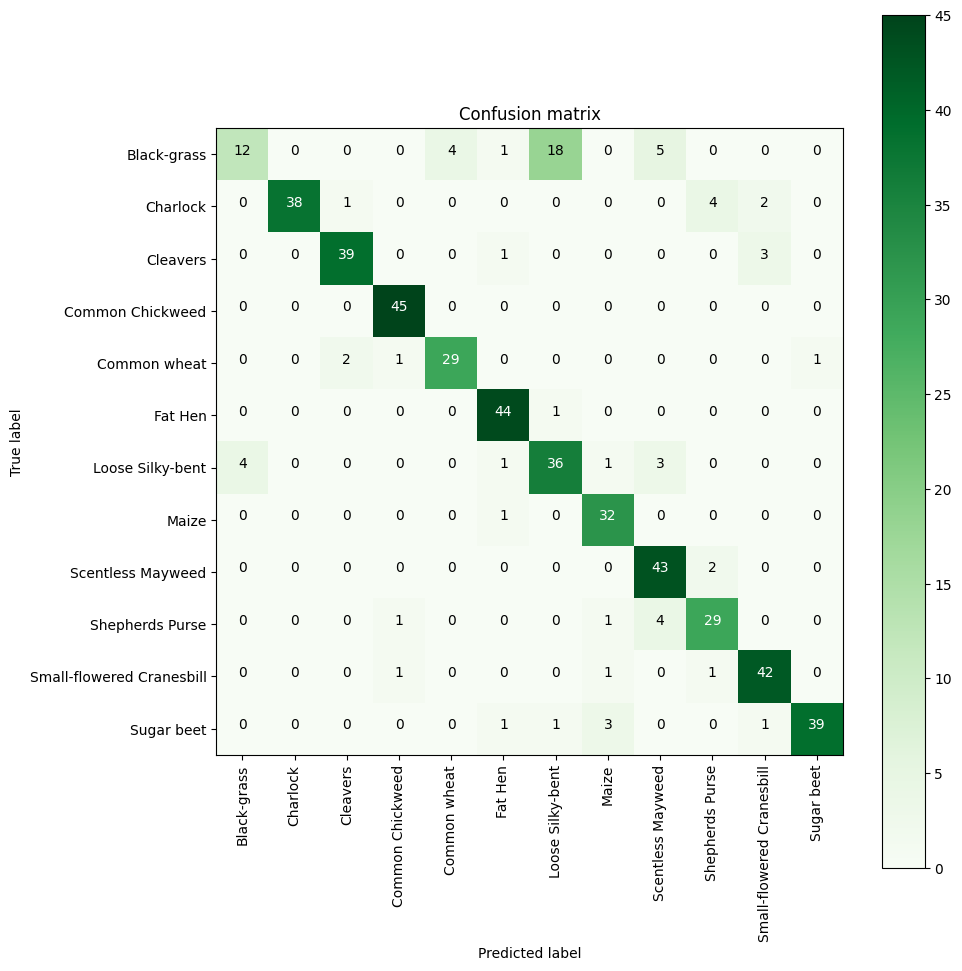

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


predY = classifier.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 


confusionMTX = confusion_matrix(trueY, predYClasses) 


plot_confusion_matrix(confusionMTX, classes = categ) 

In [47]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.846386264716155
0.8577154308617234
0.8487756746449041
[0.42857143 0.91566265 0.91764706 0.96774194 0.87878788 0.93617021
 0.71287129 0.90140845 0.86       0.81690141 0.90322581 0.91764706]


In [48]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.75      0.30      0.43        40
                 Charlock       1.00      0.84      0.92        45
                 Cleavers       0.93      0.91      0.92        43
         Common Chickweed       0.94      1.00      0.97        45
             Common wheat       0.88      0.88      0.88        33
                  Fat Hen       0.90      0.98      0.94        45
         Loose Silky-bent       0.64      0.80      0.71        45
                    Maize       0.84      0.97      0.90        33
        Scentless Mayweed       0.78      0.96      0.86        45
          Shepherds Purse       0.81      0.83      0.82        35
Small-flowered Cranesbill       0.88      0.93      0.90        45
               Sugar beet       0.97      0.87      0.92        45

                 accuracy                           0.86       499
                macro avg       0.86      0.86      0.85    

In [49]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[455,   4],
        [ 28,  12]],

       [[454,   0],
        [  7,  38]],

       [[453,   3],
        [  4,  39]],

       [[451,   3],
        [  0,  45]],

       [[462,   4],
        [  4,  29]],

       [[449,   5],
        [  1,  44]],

       [[434,  20],
        [  9,  36]],

       [[460,   6],
        [  1,  32]],

       [[442,  12],
        [  2,  43]],

       [[457,   7],
        [  6,  29]],

       [[448,   6],
        [  3,  42]],

       [[453,   1],
        [  6,  39]]])

In [50]:
history_df = pd.DataFrame(model1.history)
history_df.head()

accuracy      loss  val_accuracy   val_loss
0  0.319432  2.146051      0.086345   5.089886
1  0.469046  1.563437      0.086345   9.077167
2  0.510748  1.370264      0.086345  14.352448
3  0.567928  1.197109      0.086345  16.608801
4  0.631126  1.056391      0.086345  15.772126

<Axes: title={'center': 'Accuracy'}>

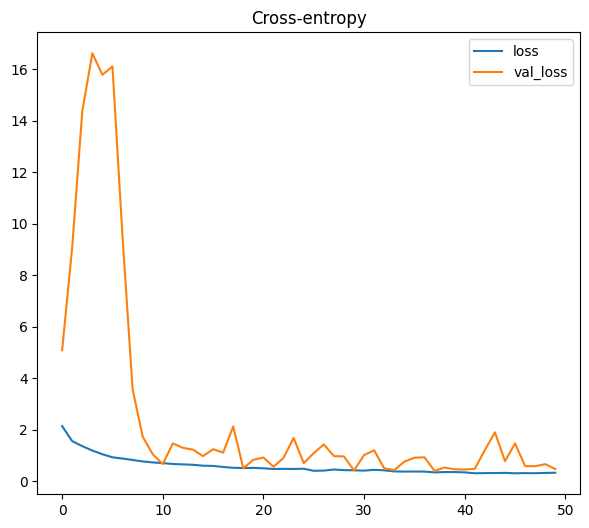

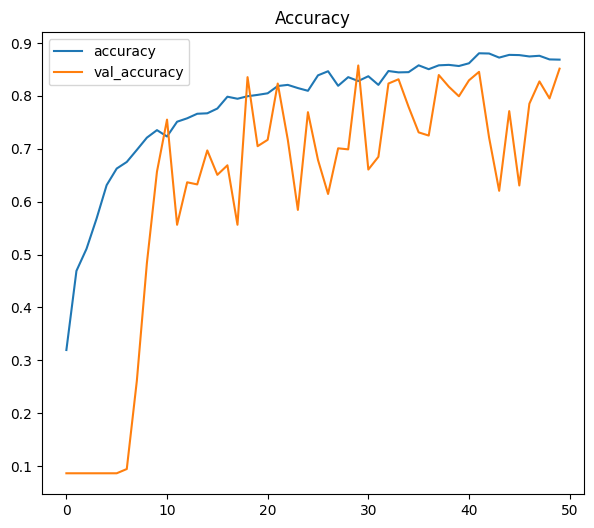

In [51]:
plt.rcParams["figure.figsize"] = (7,6)


history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Model predicted category for X_test 7 is: [0]
Actual Category for X_test 7 is: 0
Actual Category Name for X_test 7 is: Black-grass


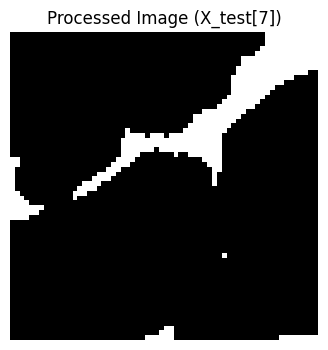

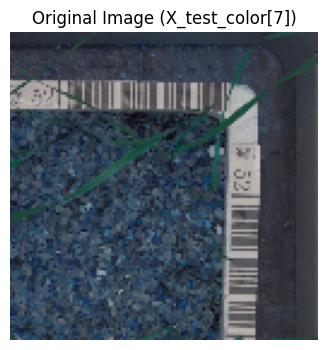

--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Model predicted category for X_test 11 is: [8]
Actual Category for X_test 11 is: 9
Actual Category Name for X_test 11 is: Shepherds Purse


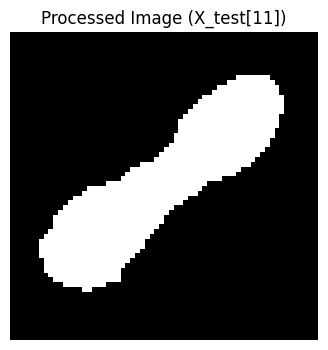

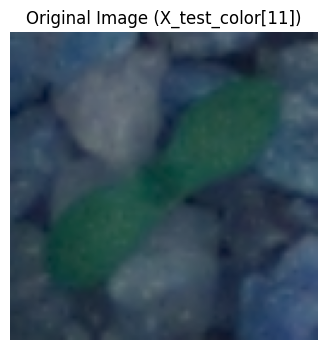

--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Model predicted category for X_test 23 is: [5]
Actual Category for X_test 23 is: 5
Actual Category Name for X_test 23 is: Fat Hen


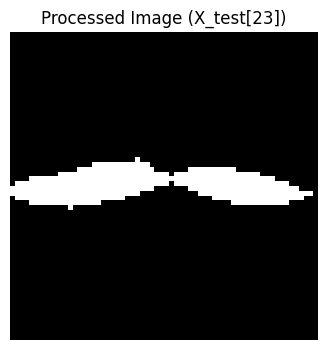

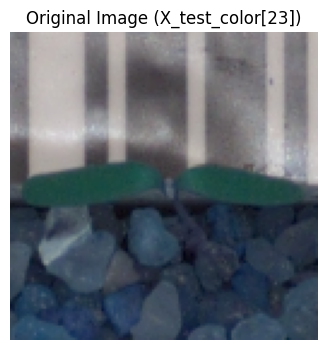

--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Model predicted category for X_test 37 is: [1]
Actual Category for X_test 37 is: 1
Actual Category Name for X_test 37 is: Charlock


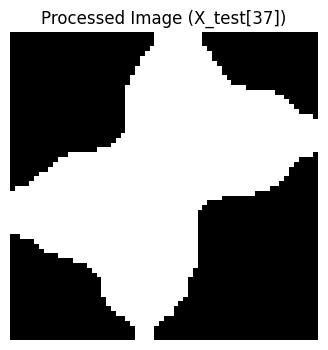

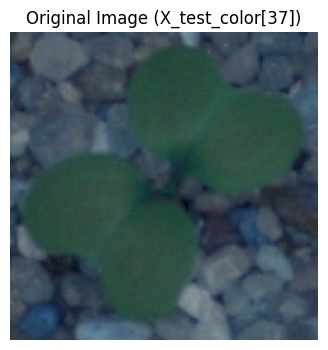

--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Model predicted category for X_test 58 is: [7]
Actual Category for X_test 58 is: 7
Actual Category Name for X_test 58 is: Maize


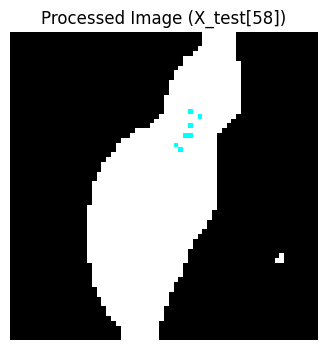

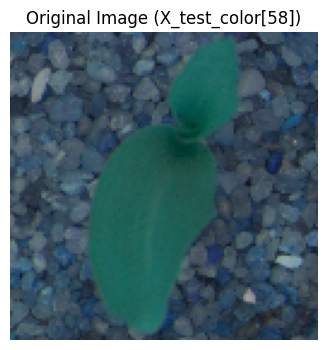

--------------------------------------------------------------------------------------------------


In [58]:
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title):
    plt.figure(figsize=(4, 4))
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Test ve tahminlerin görselleştirilmesi
indices = [7, 11, 23, 37, 58]

for idx in indices:
    pred = np.argmax(classifier.predict(np.expand_dims(X_test[idx], axis=0)), axis=1)
    actual = np.argmax(y_test[idx])
    
    print(f"Model predicted category for X_test {idx} is: {pred}")
    print(f"Actual Category for X_test {idx} is: {actual}")
    print(f"Actual Category Name for X_test {idx} is: {categ[actual]}")
    
    # Görüntüleri gösterme
    display_image(X_test[idx] * 255, f"Processed Image (X_test[{idx}])")
    display_image(X_test_color[idx], f"Original Image (X_test_color[{idx}])")
    print("--------------------------------------------------------------------------------------------------")


In [ ]:
classifier.save('classifier7.h5')                     
classifier.save_weights('classifier7.weights.h5') 